<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Statistical machine learning - Notebook 2, version for students
**Author: Michał Ciach**  
**Date: 21.10.2021**

## Description

In this notebook, we will learn a basic technique of exploratory statistics called *clustering*, which is a method of partitioning a set of points into groups. It's an example of an *unsupervised learning* algorithm - it's task is to identify interesting patterns in the data, as opposed to *supervised learning* algorithms, which are used to predict features of new data points based on previous examples.   

<center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/SLINK-density-data.svg/800px-SLINK-density-data.svg.png' height="400">

*An example of a clustered data set. Clusters of points are labeled with different colors.   
Source: https://commons.wikimedia.org/wiki/File:SLINK-density-data.svg*
</center>



There are many different clustering algorithms. One of the reasons for this is that clustering is not a well-defined problem. There is not a single function that needs to be optimized, like in mathematical analysis. Instead, clustering is supposed to reflect our intuitions about the structure of the data, and to be useful in a particular application. As a consequence, each clustering algorithm solves its own optimization problem, and has its advantages and disadvantages when it comes to solving real-life problems.  

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/SLINK-Gaussian-data.svg/800px-SLINK-Gaussian-data.svg.png' height="400">

*A less trivial example.   
Source: https://commons.wikimedia.org/wiki/File:SLINK-Gaussian-data.svg*
</center>

In this class, we will learn how to use two popular clustering methods: the *k-means* algorithm and the *hierarchical clustering*. However, before we can use them, we need to learn the basic methods of data pre-processing.

Run the cell below to load the required data sets to the notebook's environment. 

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
!gdown https://drive.google.com/uc?id=1FInZ2jrlZGNColU4sHF9JKGHP39fTVut
!gdown https://drive.google.com/uc?id=1n1qS6dcVVKcVJOuUIIm0VTz6cSyrtzDH

Downloading...
From: https://drive.google.com/uc?id=1GW1pjKOCoKOlC4Jqbqql_ghYD_n0iC6O
To: /content/BDL municipality incomes 2015-2020.csv
100% 228k/228k [00:00<00:00, 81.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FInZ2jrlZGNColU4sHF9JKGHP39fTVut
To: /content/BDL municipality area km2 2015-2020.csv
100% 180k/180k [00:00<00:00, 59.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n1qS6dcVVKcVJOuUIIm0VTz6cSyrtzDH
To: /content/BDL municipality population 2015-2020.csv
100% 222k/222k [00:00<00:00, 31.8MB/s]


## Importing Python libraries & loading the data

In today's class, we will use the libraries from class 1: Pandas and Plotly Express.  
We will also introduce three new libraries: `numpy` for mathematical operations (traditionally imported as `np`), and `scikit-learn` (called `sklearn` in Python) and `scipy` for clustering. From the latter two, we will only import selected functions.   

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy 

Now, we will load the data from three files:  
- `BDL municipality incomes 2015-2020.csv`, incomes of Polish municipalities
- `BDL municipality area km2 2015-2020.csv`, areas of Polish municipalities (in square kilometers)
- `BDL municipality population 2015-2020.csv`, populations of Polish municipalities.  
The columns of the first file are separated with a semicolon `;`, while for the other two files with a tab `\t`. 

**Exercise 1.** Use the `pd.read_csv()` function to load the data into three data frames called `income`, `area` and `population` respectively.  
Remember to set the column separator using the `sep` keyword argument, and the data type of the `Code` column using the `dtype` keyword argument.  
Display the data frames to check if they are loaded correctly.  
Check the numbers of rows and columns in each data frame.  

In [4]:
income = pd.read_csv('BDL municipality incomes 2015-2020.csv', sep =';')
area = pd.read_csv('BDL municipality area km2 2015-2020.csv', sep ='\t')
population = pd.read_csv('BDL municipality population 2015-2020.csv', sep ='\t')

In [7]:
income

,Code,Region,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),9.776646e+07,9.658595e+07,1.003549e+08,1.000265e+08,1.107985e+08,1.138563e+08
1,201022,Bolesławiec (2),3.107224e+07,2.913815e+07,3.683091e+07,3.484836e+07,3.871533e+07,4.288890e+07
2,201032,Gromadka (2),1.089941e+07,1.313974e+07,1.454154e+07,2.705794e+07,2.572157e+07,2.754443e+07
3,201043,Nowogrodziec (3),1.856915e+07,2.941747e+07,3.188345e+07,3.178886e+07,3.913420e+07,3.341908e+07
4,201052,Osiecznica (2),1.674647e+07,1.709802e+07,1.760182e+07,1.984173e+07,2.177626e+07,2.484304e+07
...,...,...,...,...,...,...,...,...
2504,3218043,Resko (3),1.523513e+07,1.448583e+07,1.611091e+07,1.763241e+07,1.760038e+07,1.941628e+07
2505,3218053,Węgorzyno (3),1.069708e+07,1.037428e+07,1.082646e+07,1.201310e+07,1.359405e+07,2.503944e+07
2506,3261011,Koszalin (1),2.697281e+08,2.891235e+08,3.054048e+08,3.245613e+08,3.432316e+08,3.840694e+08
2507,3262011,Szczecin (1),1.350327e+09,1.372046e+09,1.343422e+09,1.431826e+09,1.545381e+09,1.739014e+09


In [6]:
 area

,Code,Region,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),24.0,24.0,24.0,24.0,24.0,24.0
1,201022,Bolesławiec (2),288.0,288.0,288.0,288.0,289.0,289.0
2,201032,Gromadka (2),268.0,268.0,268.0,268.0,268.0,268.0
3,201043,Nowogrodziec (3),176.0,176.0,176.0,176.0,176.0,176.0
4,201044,Nowogrodziec - miasto (4),16.0,16.0,16.0,16.0,16.0,16.0
...,...,...,...,...,...,...,...,...
3806,3218054,Węgorzyno - miasto (4),7.0,7.0,7.0,7.0,7.0,7.0
3807,3218055,Węgorzyno - obszar wiejski (5),249.0,249.0,249.0,249.0,249.0,249.0
3808,3261011,Koszalin (1),98.0,98.0,98.0,98.0,98.0,98.0
3809,3262011,Szczecin (1),301.0,301.0,301.0,301.0,301.0,301.0


In [5]:
population

,Code,Region,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),39373.0,39167.0,39084.0,38935.0,38872.0,38486.0
1,201022,Bolesławiec (2),14104.0,14210.0,14391.0,14626.0,14699.0,14863.0
2,201032,Gromadka (2),5438.0,5417.0,5345.0,5367.0,5337.0,5317.0
3,201043,Nowogrodziec (3),15281.0,15311.0,15290.0,15258.0,15214.0,15229.0
4,201044,Nowogrodziec - miasto (4),4259.0,4237.0,4244.0,4235.0,4207.0,4263.0
...,...,...,...,...,...,...,...,...
3806,3218054,Węgorzyno - miasto (4),2883.0,2889.0,2865.0,2831.0,2779.0,2771.0
3807,3218055,Węgorzyno - obszar wiejski (5),4215.0,4216.0,4196.0,4168.0,4111.0,4085.0
3808,3261011,Koszalin (1),107970.0,107680.0,107670.0,107321.0,107048.0,106235.0
3809,3262011,Szczecin (1),405657.0,404878.0,403883.0,402465.0,401907.0,398255.0


## Joining Pandas data frames

As a first step, we need to join the three data frames into one to get a single data frame with the information for all municipalities. Note, however, that there are different numbers of rows in each data frame. This is because the data about the income uses a different mapping of regions and is partially incomplete (welcome to the world of public data sets). Because of this, we can't just stack the columns side by side.   
Instead, we need to perform an *inner join* operation using a *key* - that is, use the territorial code as a row identifier and stack the columns according to it. An *inner join*, as opposed to an *outer join*, means that we will only take the territorial codes that are in all three data frames, instead of all the codes that are found in any of the three.  

First, we will join the `income` and the `area` data frames. For this, we will use the `pd.merge` function. The `on` keyword argument specifies the column names that will be used as a key. The `suffixes` keyword argument specifies the text that will be added to the column names of the input data frames.  

In [8]:
joint = pd.merge(income, area, on=['Code', 'Region'], suffixes=[' income', ' area'])

In [9]:
joint

,Code,Region,2015 income,2016 income,2017 income,2018 income,2019 income,2020 income,2015 area,2016 area,2017 area,2018 area,2019 area,2020 area
0,201011,Bolesławiec (1),9.776646e+07,9.658595e+07,1.003549e+08,1.000265e+08,1.107985e+08,1.138563e+08,24.0,24.0,24.0,24.0,24.0,24.0
1,201022,Bolesławiec (2),3.107224e+07,2.913815e+07,3.683091e+07,3.484836e+07,3.871533e+07,4.288890e+07,288.0,288.0,288.0,288.0,289.0,289.0
2,201032,Gromadka (2),1.089941e+07,1.313974e+07,1.454154e+07,2.705794e+07,2.572157e+07,2.754443e+07,268.0,268.0,268.0,268.0,268.0,268.0
3,201043,Nowogrodziec (3),1.856915e+07,2.941747e+07,3.188345e+07,3.178886e+07,3.913420e+07,3.341908e+07,176.0,176.0,176.0,176.0,176.0,176.0
4,201052,Osiecznica (2),1.674647e+07,1.709802e+07,1.760182e+07,1.984173e+07,2.177626e+07,2.484304e+07,438.0,438.0,438.0,438.0,437.0,437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,3218043,Resko (3),1.523513e+07,1.448583e+07,1.611091e+07,1.763241e+07,1.760038e+07,1.941628e+07,285.0,285.0,285.0,285.0,285.0,285.0
2505,3218053,Węgorzyno (3),1.069708e+07,1.037428e+07,1.082646e+07,1.201310e+07,1.359405e+07,2.503944e+07,256.0,256.0,256.0,256.0,256.0,256.0
2506,3261011,Koszalin (1),2.697281e+08,2.891235e+08,3.054048e+08,3.245613e+08,3.432316e+08,3.840694e+08,98.0,98.0,98.0,98.0,98.0,98.0
2507,3262011,Szczecin (1),1.350327e+09,1.372046e+09,1.343422e+09,1.431826e+09,1.545381e+09,1.739014e+09,301.0,301.0,301.0,301.0,301.0,301.0


**Exercise 2.** Note that we have used both the `Code` and the `Region` columns as a key. What would happen if we used only the `Code` column? 

Now, we will join the `joint` data frame with the `population` one. Instead of writing `pd.merge(joint, population)`, we can simply write `joint.merge(population)`. Both ways are equivalent for methods associated with Python objects. 

In [10]:
joint = joint.merge(population, on=['Code', 'Region'], suffixes= ['', ' population'])

In [11]:
joint.head()

,Code,Region,2015 income,2016 income,2017 income,2018 income,2019 income,2020 income,2015 area,2016 area,2017 area,2018 area,2019 area,2020 area,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),97766455.51,96585948.26,1.003549e+08,1.000265e+08,1.107985e+08,1.138563e+08,24.0,24.0,24.0,24.0,24.0,24.0,39373.0,39167.0,39084.0,38935.0,38872.0,38486.0
1,201022,Bolesławiec (2),31072239.80,29138151.04,3.683091e+07,3.484836e+07,3.871533e+07,4.288890e+07,288.0,288.0,288.0,288.0,289.0,289.0,14104.0,14210.0,14391.0,14626.0,14699.0,14863.0
2,201032,Gromadka (2),10899408.78,13139743.96,1.454154e+07,2.705794e+07,2.572157e+07,2.754443e+07,268.0,268.0,268.0,268.0,268.0,268.0,5438.0,5417.0,5345.0,5367.0,5337.0,5317.0
3,201043,Nowogrodziec (3),18569147.18,29417467.57,3.188345e+07,3.178886e+07,3.913420e+07,3.341908e+07,176.0,176.0,176.0,176.0,176.0,176.0,15281.0,15311.0,15290.0,15258.0,15214.0,15229.0
4,201052,Osiecznica (2),16746467.73,17098022.83,1.760182e+07,1.984173e+07,2.177626e+07,2.484304e+07,438.0,438.0,438.0,438.0,437.0,437.0,7490.0,7482.0,7398.0,7371.0,7349.0,7288.0


Alas! The adding of suffixes didn't work, and the new columns are named 2015-2020. The reason is that Pandas adds suffixes only to columns with *duplicated* column names. There is currently no way to force Pandas to add suffixes to all columns during merge operations (although the issue has been debated for years now), and we need to rename the columns by hand.  
This is how to do it with as little code as possible:  

In [12]:
joint = joint.rename(columns = {str(year) : str(year) + ' population' for year in range(2015, 2021)})

In [13]:
joint.head()

,Code,Region,2015 income,2016 income,2017 income,2018 income,2019 income,2020 income,2015 area,2016 area,2017 area,2018 area,2019 area,2020 area,2015 population,2016 population,2017 population,2018 population,2019 population,2020 population
0,201011,Bolesławiec (1),97766455.51,96585948.26,1.003549e+08,1.000265e+08,1.107985e+08,1.138563e+08,24.0,24.0,24.0,24.0,24.0,24.0,39373.0,39167.0,39084.0,38935.0,38872.0,38486.0
1,201022,Bolesławiec (2),31072239.80,29138151.04,3.683091e+07,3.484836e+07,3.871533e+07,4.288890e+07,288.0,288.0,288.0,288.0,289.0,289.0,14104.0,14210.0,14391.0,14626.0,14699.0,14863.0
2,201032,Gromadka (2),10899408.78,13139743.96,1.454154e+07,2.705794e+07,2.572157e+07,2.754443e+07,268.0,268.0,268.0,268.0,268.0,268.0,5438.0,5417.0,5345.0,5367.0,5337.0,5317.0
3,201043,Nowogrodziec (3),18569147.18,29417467.57,3.188345e+07,3.178886e+07,3.913420e+07,3.341908e+07,176.0,176.0,176.0,176.0,176.0,176.0,15281.0,15311.0,15290.0,15258.0,15214.0,15229.0
4,201052,Osiecznica (2),16746467.73,17098022.83,1.760182e+07,1.984173e+07,2.177626e+07,2.484304e+07,438.0,438.0,438.0,438.0,437.0,437.0,7490.0,7482.0,7398.0,7371.0,7349.0,7288.0


Now that our data frames are successfully combined, we can perform basic pre-processing.

## Pre-processing

In the first step, we will extract two columns that we will use for clustering later on: the area and the income in 2020. 

This is how we select columns of a data frame and assign them to a new one:

In [14]:
two_features = joint[['2020 area', '2020 income']]
two_features

,2020 area,2020 income
0,24.0,1.138563e+08
1,289.0,4.288890e+07
2,268.0,2.754443e+07
3,176.0,3.341908e+07
4,437.0,2.484304e+07
...,...,...
2504,285.0,1.941628e+07
2505,256.0,2.503944e+07
2506,98.0,3.840694e+08
2507,301.0,1.739014e+09


In the next step, we will handle missing data. Our data frames contain empty cells, which are visible in the fragment of the `income` table below:

In [15]:
income[:10]

,Code,Region,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),97766455.51,96585948.26,1.003549e+08,1.000265e+08,1.107985e+08,1.138563e+08
1,201022,Bolesławiec (2),31072239.80,29138151.04,3.683091e+07,3.484836e+07,3.871533e+07,4.288890e+07
2,201032,Gromadka (2),10899408.78,13139743.96,1.454154e+07,2.705794e+07,2.572157e+07,2.754443e+07
3,201043,Nowogrodziec (3),18569147.18,29417467.57,3.188345e+07,3.178886e+07,3.913420e+07,3.341908e+07
4,201052,Osiecznica (2),16746467.73,17098022.83,1.760182e+07,1.984173e+07,2.177626e+07,2.484304e+07
5,201062,Warta Bolesławiecka (2),16269705.86,16155351.58,1.607058e+07,1.679422e+07,1.805470e+07,1.924480e+07
6,202011,Bielawa (1),54275286.40,58726765.35,6.079668e+07,6.144334e+07,7.013804e+07,6.791626e+07
7,202021,Dzierżoniów (1),54941541.12,61744190.73,6.177496e+07,7.117189e+07,8.166489e+07,7.968667e+07
8,202031,Pieszyce (1),14010178.59,NaN,NaN,NaN,NaN,NaN
9,202033,Pieszyce (3),NaN,12676399.25,1.275699e+07,1.485650e+07,1.663649e+07,1.657518e+07


It turns out that Pieszyce acquired city rights in 2016 and its territorial code changed, leading to empty cells that we need to handle.  
How to do it depends on the task at hand. For example, if we didn't care if a municipality is a village or a city, we could merge the two rows of Pieszyce. However, in this notebook, we will use an alternative strategy, that is commonly used and much simpler - just get rid of them. 

In order to remove rows which contain any empty cell, we use the `pd.dropna()` function.  

In [16]:
two_features = two_features.dropna()
two_features

,2020 area,2020 income
0,24.0,1.138563e+08
1,289.0,4.288890e+07
2,268.0,2.754443e+07
3,176.0,3.341908e+07
4,437.0,2.484304e+07
...,...,...
2504,285.0,1.941628e+07
2505,256.0,2.503944e+07
2506,98.0,3.840694e+08
2507,301.0,1.739014e+09


You can see that the number of rows decreased from 2509 to 2477.  

**Exercise 3 (a thought experiment).** Instead of using `pd.dropna()` on `two_features`, we could first use it on `joint`, and then select the two columns.  
What would be the disadvantage of this?  

## Data transformations

After we have cleaned our data, the next step is to visualize it.  
We can use any of the plot types from the previous class - a boxplot, a histogram, or a scatter plot.    

As a first step, we will use a scatter plot to visualize the relationship between the area and the income of municipalities.  

In [17]:
px.scatter(two_features, '2020 area', '2020 income')

As you can see, it's completely useless. This is because of the range of the data - some municipalities are huge, some are small; some municipalities have large incomes, some do not.  

In the last class, we have learned how to generate more detailed plots by selecting fragments of the data. Now, we will learn another common technique - to transform it.  

In a case like this, when the values span several orders of magnitude, it is common to use a logarithmic transformation - i.e. to apply a logarithm to the columns and then to plot them.  

To calculate the logarithms of the area an the income, we will use the `numpy` library and the `np.log10()` function. 
In statistical data analysis, we generally prefer base-10 logarithm to the natural one, because its units are easy to interpret as the orders of magnitude.  

This is how we calculate the base-10 logarithms of the values in our data frame:

In [18]:
two_features_log10 = np.log10(two_features)

**Exercise 4.** Plot the transformed data on a scatter plot.  

In [19]:
px.scatter(two_features_log10, '2020 area', '2020 income')

A similar result can be obtained by applying `px.scatter()` to the original `two_features` data and specifying the `log_x = True` and `log_y = True` keyword arguments. An advantage of this approach is that the plot axes and points are labeled with original values, instead of logarithms, so the plot is easier to interpret. A disadvantage is that this is the only transformation implemented in Plotly Express.   
**Exercise 5.** Check it out. See what happens if you transform only one axis.    

In [20]:
px.scatter(two_features, '2020 area', '2020 income', log_x = True, log_y = True)

**Exercise 6.** Can you see some clusters in the scatter plot of the log-transformed data? How many?  

## Clustering 2-dimentional data

After cleaning up and transforming our data, we can proceed with clustering. We'll start with the popular *k-means* algorithm, described in detail in the lecture. The main features of this algorithm from the practical point of view:
- Requires the user to specify the number of clusters  
- Produces clusters similar in size (in terms of area)  
- Uses an iterative procedure - may not converge to a global optimum 

To perform a k-means clustering in Python, we use the `KMeans` function from the scikit-learn package. You can find its documentation and usage examples [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).  

**Exercise 7.** Based on the usage examples of `KMeans` from scikit-learn webpage linked above, perform a k-means clustering of the `two_features_log10` data frame. Choose the number of clusters on your own. Save the results in a variable called `km_2`.  
Visualize the results on a scatter plot by passing the cluster labels of points, `km_2.labels_`, to the `color` argument of `px.scatter()`.  
Is the clustering similar to what you expected? Check the results for a different number of clusters.   

In [21]:
km_2 = KMeans(n_clusters = 3).fit(two_features_log10)

In [22]:
px.scatter(two_features, '2020 area', '2020 income', log_x = True, log_y = True, color = km_2.labels_)

A much different approach to clustering is the *hierarchical clustering*, in which we create a tree (called a *dendrogram*) that represents similarity between points and between clusters.  
In the lecture, you will learn more about the single-linkage and the average-linkage algorithms. In this class, we will use another type of linkage, the Ward linkage. The word *linkage* refers to the method of computing distance between clusters.  

The scikit-learn library does not have methods to visualize dendrograms. Therefore, we will use methods from the `scipy` package.  
First, we perform the clustering using the `hierarchy.linkage` method, and then we visualize it using `hierarchy.dendrogram`.  

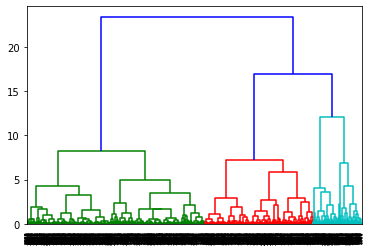

In [23]:
scipy_clustering = hierarchy.linkage(two_features_log10, method='ward')
dendrogram = hierarchy.dendrogram(scipy_clustering)

The branch lengths above represnt the distances between clusters and allows us to decide on the final number of clusters. For example, if we cut the dendrogram at the height of 15 on the plot above, we get three clusters - represented as the green, red, and cyan subtree.   

**Exercise 8.** Decide on the number of clusters based on the dendrogram. Next, perform hierarchical clustering with the Ward linkage using the `AgglomerativeClustering` function from scikit-learn (imported at the beginning of this notebook).  
You can find documentation and usage examples [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).  
Visualize the results on a scatter plot. How do they compare to the k-means ones? Which do you prefer?  
**Homework:** Check the results for a different affinity (measuring the distance between points) and linkage (measuring the distance between clusters).   

In [38]:
clustering = AgglomerativeClustering(n_clusters=3).fit(two_features_log10)

In [39]:
px.scatter(two_features, '2020 area', '2020 income', log_x = True, log_y = True, color = clustering.labels_)

## Clustering multi-dimentional data 

The real power of clustering algorithms lies in the fact that we don't need to limit ourselves to two dimentions (otherwise, we could just cluster the data using a pencil and a sheet of paper).  
This is because they rely on mathematical distances, such as the Euclidean distance, which typically work for any number of dimentions.  
This way, we can use multiple features to cluster our data set.  

**Exercise 9.** Construct a data frame called `three_features` with three columns from the `joint` data frame: `2020 area`, `2020 income` and `2020 population`. Remove rows containing missing values using the `pd.dropna()` function. Perform a log-10 transformation and store the results in a `three_features_log10` data frame.  
Visualize the relation between population and income on a scatter plot.  

In [27]:
three_features = joint[['2020 area', '2020 income', '2020 population']]
three_features = three_features.dropna()
three_features_log10 = np.log10(three_features)
three_features_log10

,2020 area,2020 income,2020 population
0,1.380211,8.056357,4.585303
1,2.460898,7.632345,4.172106
2,2.428135,7.440034,3.725667
3,2.245513,7.523995,4.182671
4,2.640481,7.395205,3.862608
...,...,...,...
2504,2.454845,7.288166,3.896802
2505,2.408240,7.398625,3.836071
2506,1.991226,8.584410,5.026268
2507,2.478566,9.240303,5.600161


In [28]:
px.scatter(three_features, '2020 population', '2020 income', log_x = True, log_y = True)

**Exercise 10.** Perform a k-means clustering on `three_features_log10` with a selected number of clusters and visualize the resuls on an area vs income scatter plot and on a population vs income plot.  
Can you see the differences between this and the previous k-means clustering? 

In [35]:
km_3 = KMeans(n_clusters=2).fit(three_features_log10)

In [36]:
px.scatter(three_features, '2020 area', '2020 income', log_x = True, log_y = True, color = km_3.labels_)

In [37]:
px.scatter(three_features, '2020 population', '2020 income', log_x = True, log_y = True, color = km_3.labels_)

**Exercise 10 - homework.** Perform a hierarchical clustering with the selected number of clusters, affinity, and linkage method on the `three_features_log10` data frame.  
Visualize the results on an area vs income scatter plot, and on a population vs income plot.  

In [46]:
clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit(three_features_log10)

In [47]:
px.scatter(three_features, '2020 area', '2020 income', log_x = True, log_y = True, color = clustering.labels_)

In [48]:
px.scatter(three_features, '2020 population', '2020 income', log_x = True, log_y = True, color = clustering.labels_)

## Summary

Things to memorize:

- Clustering is a method of grouping points. It can be used to decrease the size of the data set or to detect intresting features without knowing what those features correspond to (*unsupervised learning*).
- Further analyses are needed to understand the real-life meaning of clusters (e.g. what types of municipalities fall into cluster 1 and why).  
- There is no "best" clustering algorithm. Each algorithm performs well for some data sets and poorly for others. It's important to understand how the algorithms work to select the appropriate method for a given data set.  
- There is no "best" clustering for a given data set, but some are obviously bad. You have to choose one that's "good enough". 
- The k-means algorithm requires the user to specify the number of clusters before the analysis and produces clusters with similar size and shape.  
- Hierarchical clustering allows to select the number of clusters in a more informed way and can produce clusters of different size and shape, but can be more computationally demanding than k-means. There are many different ways to calculate the similarity between clusters that give different results. 

<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60">

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'>


Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej".   
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>